Initialisation du robot


In [1]:
from poppy.creatures import PoppyHumanoid

poppy = PoppyHumanoid(simulator='vrep')

%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


enregistrement de la chute aprés un lever de pied

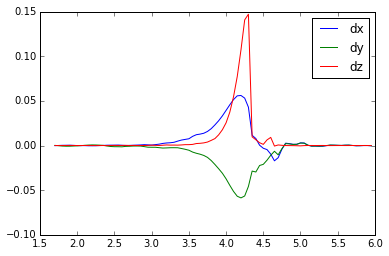

In [30]:
poppy.l_shoulder_x.goto_behavior = 'minjerk'

list_pos_x = []
list_pos_y = []
list_pos_z = []
t= []

t0 = time.time()

poppy.r_hip_y.goto_position(-50, 4)
poppy.r_knee_y.goto_position(50, 4)

pos = poppy.get_object_position('head_visual')
pos_x=pos[0]
pos_y=pos[1]
pos_z=pos[2]

action_passe = 0

while time.time() - t0 < 30:
    pos = poppy.get_object_position('head_visual')
    
    
    if pos_x != pos[0]:
        decalage_x=pos_x-pos[0]
        decalage_y=pos_y-pos[1]
        decalage_z=pos_z-pos[2]
    
    

        list_pos_x.append(decalage_x)
        list_pos_y.append(decalage_y)
        list_pos_z.append(decalage_z)
    
        pos_x = pos[0]
        pos_y = pos[1]
        pos_z = pos[2]
    
        t.append(poppy.current_simulation_time)
        #action = poppy.abs_x.goal_position=1000*decalage_y + action_passe
        #action_passe = action
        #print action
    time.sleep(0.05)
    
plot(t, list_pos_x)
plot(t, list_pos_y)
plot(t, list_pos_z)


legend(('dx', 'dy','dz'))


In [31]:
poppy.reset_simulation()
time.sleep(5)

In [91]:
dir(poppy)


['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attached_primitives',
 '_controllers',
 '_motors',
 '_primitive_manager',
 '_sensors',
 '_syncing',
 'abs_x',
 'abs_y',
 'abs_z',
 'active_primitives',
 'alias',
 'arms',
 'attach_primitive',
 'bust_x',
 'bust_y',
 'close',
 'compliant',
 'current_simulation_time',
 'dance_beat_motion',
 'get_object_position',
 'goto_position',
 'head',
 'head_y',
 'head_z',
 'l_ankle_y',
 'l_arm',
 'l_arm_z',
 'l_elbow_y',
 'l_hip_x',
 'l_hip_y',
 'l_hip_z',
 'l_knee_y',
 'l_leg',
 'l_leg_sagitall',
 'l_shoulder_x',
 'l_shoulder_y',
 'legs',
 'limit_torque',
 'motors',
 'power_up',
 'primitives',
 'r_ankle_y',
 'r_arm',
 'r_arm_z',
 'r_elbow_y',
 'r_hip_x',
 'r_hip_y',
 'r_hip_z',
 'r_knee_y',
 'r_leg',
 'r_leg_sagitall',
 'r_shoulde

In [27]:
print poppy.l_shoulder_x.__class__.__name__

DxlMXMotor


test de la vitesse de connexion avec poppy dans V-rep
ce test montre qu'il ne sert à rien d'interroger VREP plus de 10 fois par seconde car il renvoi le même résultat.